In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_competition_from_kaggle


c:\Users\IAmBlindNotDeaf\Desktop\StackFuel Weiterbildung\Lernmaterial\Abschlussprojekt\auction-car-risk-prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
competition_name = "DontGetKicked"  # Kaggle Competition Name
destination = "../data/raw"

files = load_competition_from_kaggle(
    competition_name=competition_name, 
    destination=destination,
    )

100%|██████████| 10.2M/10.2M [00:03<00:00, 3.30MB/s]

Extracting files...
Loading competition data from C:\Users\IAmBlindNotDeaf\.cache\kagglehub\competitions\DontGetKicked to ../data/raw\DontGetKicked
Moving file: C:\Users\IAmBlindNotDeaf\.cache\kagglehub\competitions\DontGetKicked\Carvana_Data_Dictionary.txt to c:\Users\IAmBlindNotDeaf\Desktop\StackFuel Weiterbildung\Lernmaterial\Abschlussprojekt\auction-car-risk-prediction\notebooks\../data/raw\DontGetKicked
Moving file: C:\Users\IAmBlindNotDeaf\.cache\kagglehub\competitions\DontGetKicked\example_entry.csv to c:\Users\IAmBlindNotDeaf\Desktop\StackFuel Weiterbildung\Lernmaterial\Abschlussprojekt\auction-car-risk-prediction\notebooks\../data/raw\DontGetKicked
Moving file: C:\Users\IAmBlindNotDeaf\.cache\kagglehub\competitions\DontGetKicked\test.csv to c:\Users\IAmBlindNotDeaf\Desktop\StackFuel Weiterbildung\Lernmaterial\Abschlussprojekt\auction-car-risk-prediction\notebooks\../data/raw\DontGetKicked
Moving file: C:\Users\IAmBlindNotDeaf\.cache\kagglehub\competitions\DontGetKicked\test.zi

In [5]:
files

['Carvana_Data_Dictionary.txt',
 'example_entry.csv',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [8]:
df = pd.read_csv("/".join(["../data/raw/", competition_name, files[4]]))
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [9]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(72983, 34)

'Description'

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.43,21077.24,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.34,1.73,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.18,1.71,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.49,0.52,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71500.00,14578.91,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.91,2461.99,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.64,2722.49,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.03,3156.29,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.93,3385.79,0.0,7493.0,9789.0,12088.0,41482.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
RefId,int64,0,72983,"[21389, 5144, 18727]"
IsBadBuy,int64,0,2,"[0, 0, 0]"
PurchDate,object,0,517,"[9/20/2010, 9/30/2010, 9/16/2010]"
Auction,object,0,3,"[MANHEIM, MANHEIM, MANHEIM]"
VehYear,int64,0,10,"[2005, 2006, 2005]"
VehicleAge,int64,0,10,"[2, 6, 3]"
Make,object,0,33,"[DODGE, MAZDA, FORD]"
Model,object,0,1063,"[1500 RAM PICKUP 2WD, ACCENT 1.6L I4 MPI, RAIN..."
Trim,object,2360,134,"[LT, SXT, XE]"
SubModel,object,8,863,"[4D SUV 2.2L 1LT, 4D WAGON SXT, 4D SEDAN SE]"


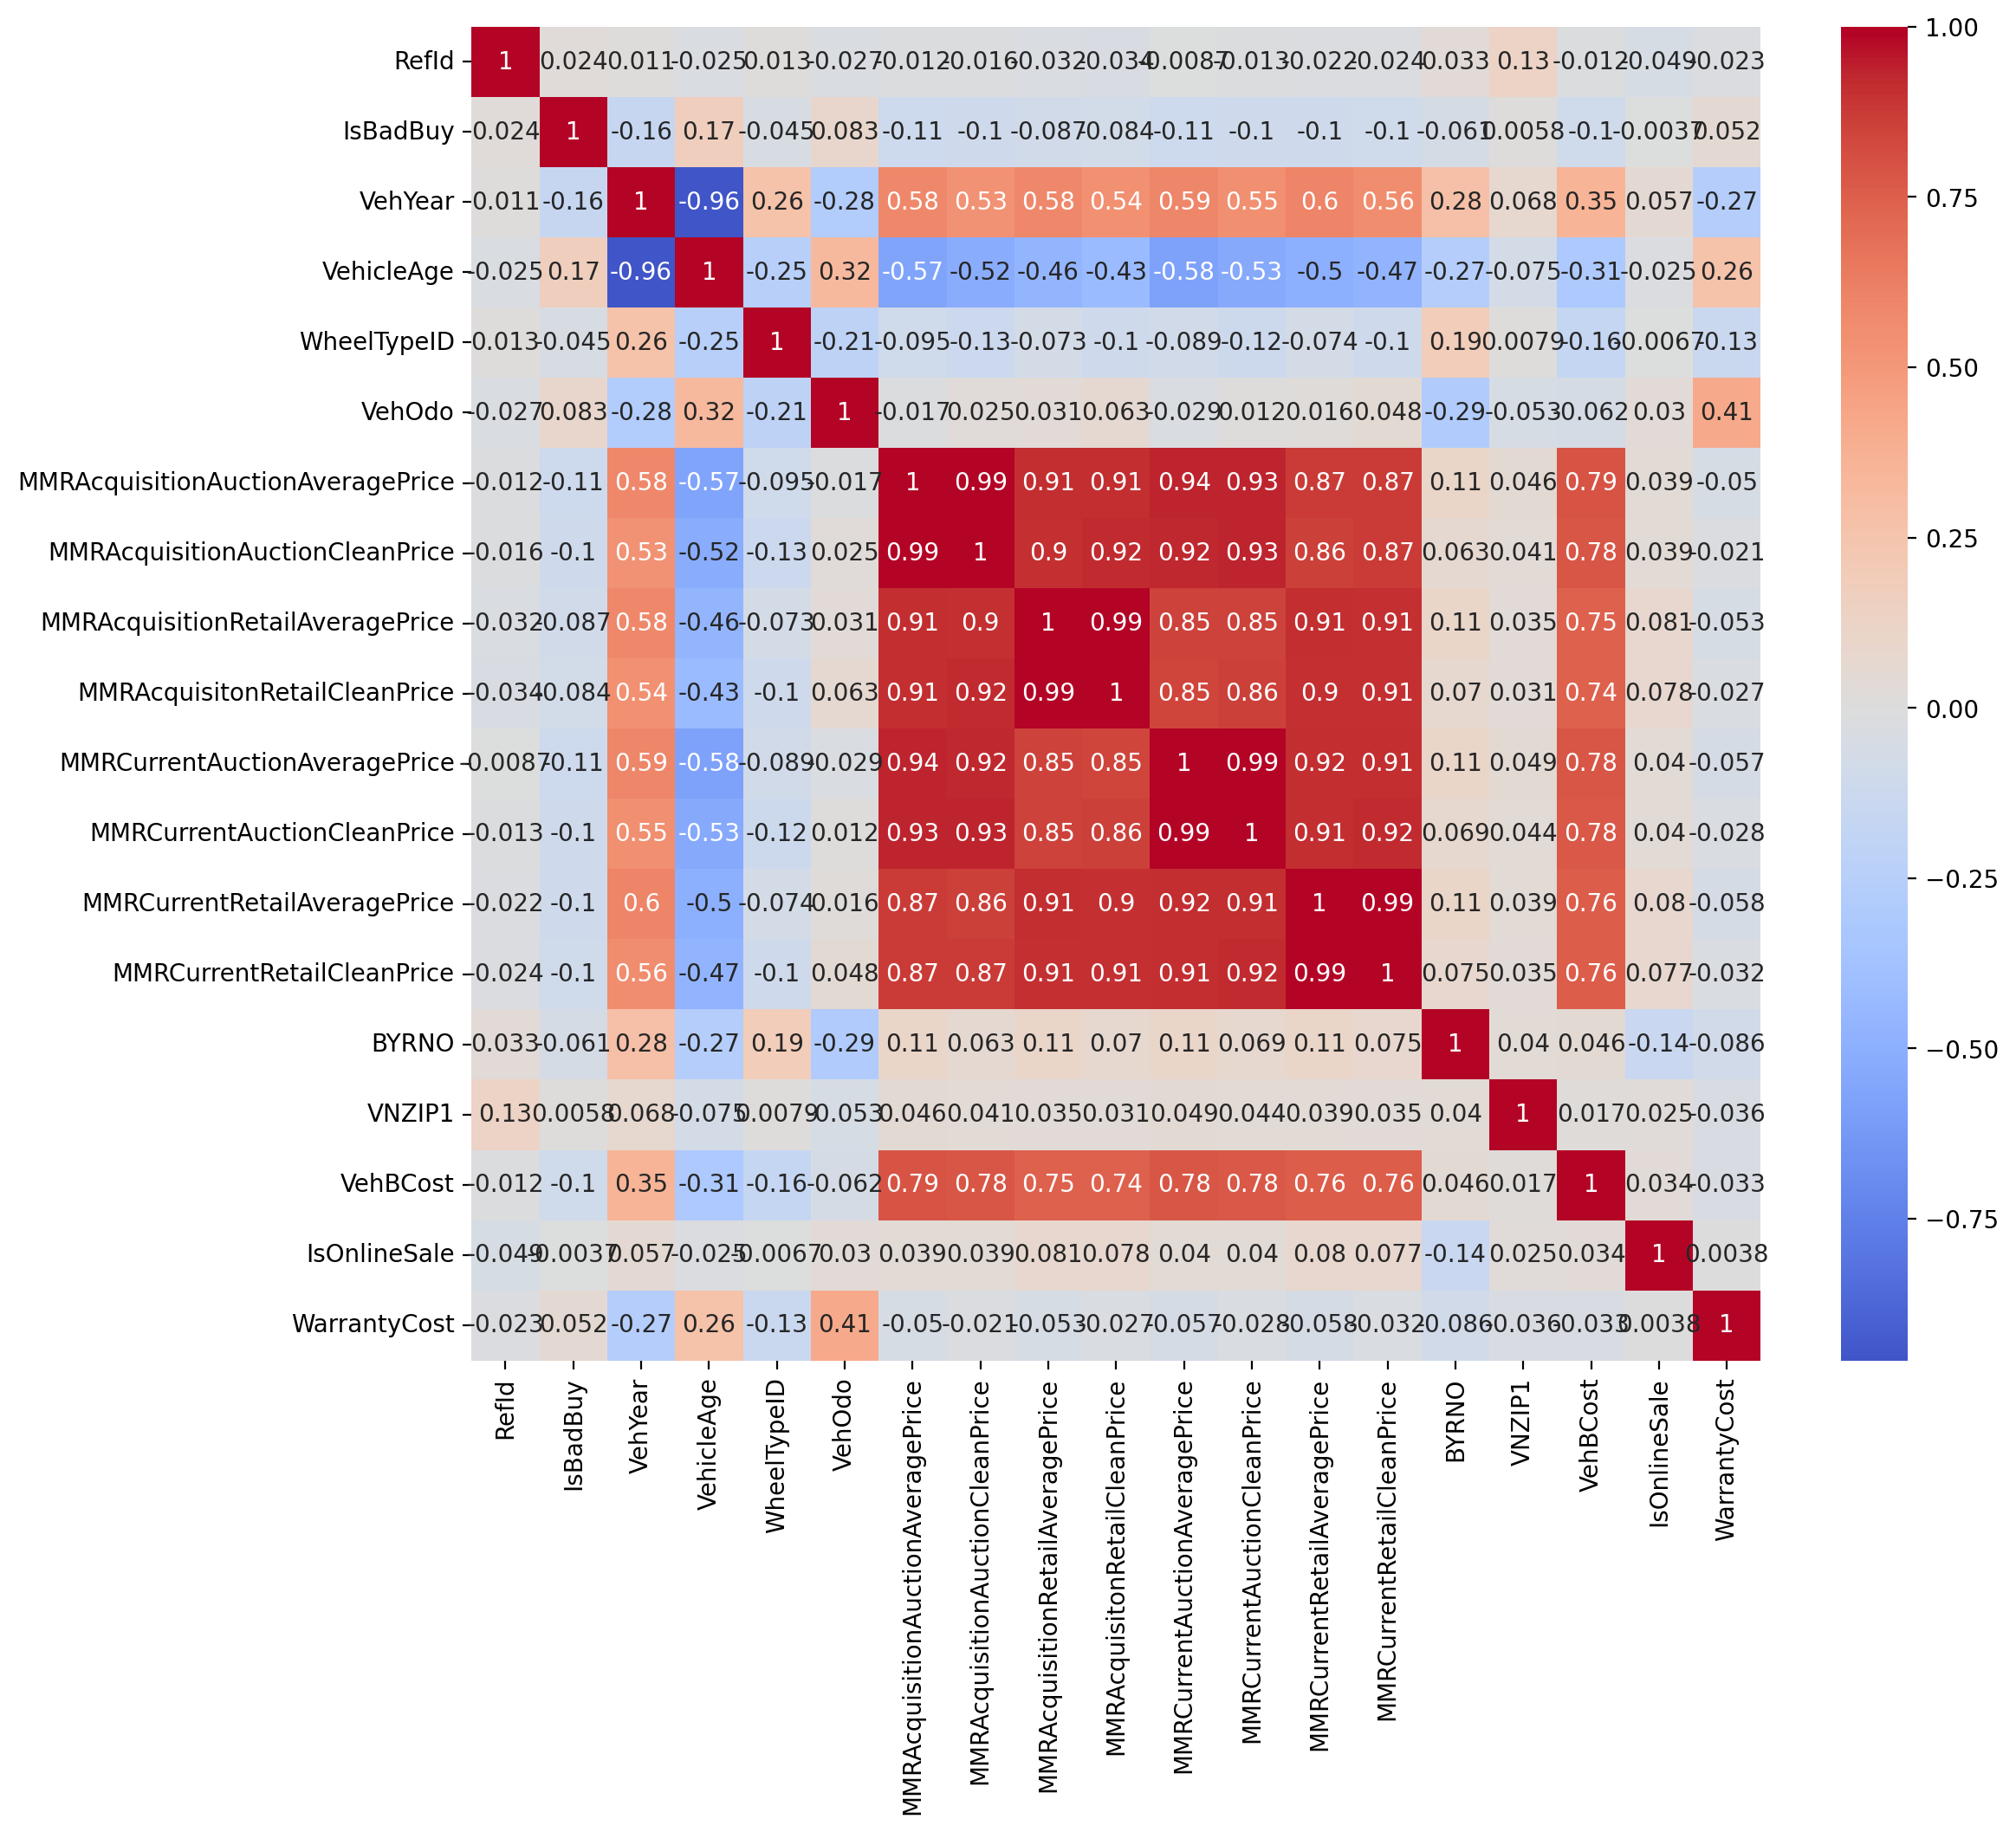

In [10]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);